In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [4]:
# Read the City and Ride Data
cdf = pd.read_csv(city_data_to_load)
cdf.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
rdf = pd.read_csv(ride_data_to_load)
rdf.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# Combine the data into a single dataset
df = pd.merge(rdf, cdf, how='left', on='city')

In [7]:
# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [8]:
# Obtain the x and y coordinates for each of the three city types
# It's easiest to just break each type into its own df now and group by city
urban_only = df[df['type']=='Urban'].groupby(['city'])
sub_only = df[df['type']=='Suburban'].groupby(['city'])
rural_only = df[df['type']=='Rural'].groupby(['city'])

In [9]:
# Average fare
urban_avg_fare = urban_only['fare'].mean()
sub_avg_fare = sub_only['fare'].mean()
rural_avg_fare = rural_only['fare'].mean()

In [10]:
# Number of rides
urban_rides = urban_only['fare'].count()
sub_rides = sub_only['fare'].count()
rural_rides = rural_only['fare'].count()

In [11]:
# Driver count
urban_drivers = urban_only['driver_count'].mean()
sub_drivers = sub_only['driver_count'].mean()
rural_drivers = rural_only['driver_count'].mean()

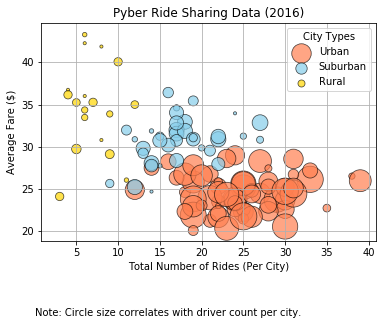

In [12]:
# Build the scatter plots for each city types
#Remember when making your plots to consider aesthetics!
# You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
# When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
# When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.

# Need to mutliply the size to make it look like something actually useful
plt.scatter(urban_rides, urban_avg_fare, s=10*urban_drivers, c='coral', edgecolor='black', linewidth=.75, alpha=.7, label='Urban')

plt.scatter(sub_rides, sub_avg_fare, s=10*sub_drivers, c='skyblue', edgecolor='black',linewidth=.75, alpha=.7, label='Suburban')

plt.scatter(rural_rides, rural_avg_fare, s=10*rural_drivers, c='gold', edgecolor='black',linewidth=.75, alpha=.7,label='Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Create a legend
plt.legend(loc='best',title='City Types')

# Incorporate a text label regarding circle size
plt.text(0, 10,'Note: Circle size correlates with driver count per city.')

# Save Figure
plt.savefig('figures/sctr1.png')

plt.show()



## Total Fares by City Type

In [13]:
# Calculate Type Percents
fare_tot = df.fare.sum()
fare_tot

63538.64

In [14]:
#Pulling the fare totals
urban_fare_tot = df[df.type=='Urban'].fare.sum()
sub_fare_tot = df[df.type=='Suburban'].fare.sum()
rural_fare_tot = df[df.type=='Rural'].fare.sum()

# ingredients in the pie chart need to be percentages, not just the sums of the fares
fare_pcts = [urban_fare_tot/fare_tot*100, sub_fare_tot/fare_tot*100, rural_fare_tot/fare_tot*100]
fare_pcts

[62.72463496228438, 30.46387206273222, 6.81149297498341]

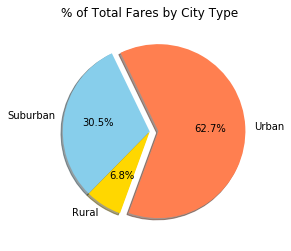

In [15]:
# Build Pie Chart
#Remember when making your plots to consider aesthetics!
# You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
# When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
# When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.
colors = ['coral','skyblue','gold']
types = ['Urban','Suburban','Rural']
explode = (0.1,0,0)
plt.pie(fare_pcts, explode=explode, labels=types, colors=colors, autopct='%1.1f%%', shadow=True, startangle=250)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('figures/pie1.png')
plt.show()

## Total Rides by City Type

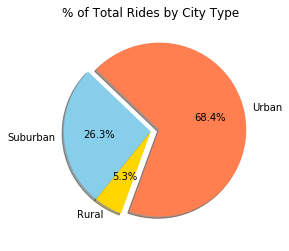

In [16]:
# Calculate Ride Percents
tot_rides = df.ride_id.count()
urb_rides = df[df.type=='Urban'].ride_id.count()
sub_rides = df[df.type=='Suburban'].ride_id.count()
rural_rides = df[df.type=='Rural'].ride_id.count()

ride_pcts = [urb_rides/tot_rides*100, sub_rides/tot_rides*100, rural_rides/tot_rides*100]

# Build Pie Chart
# We can use the colors, types, and explode from the above pie chart.

plt.pie(ride_pcts, explode=explode, labels=types, colors=colors, autopct='%1.1f%%', shadow=True, startangle=250)
plt.title('% of Total Rides by City Type')


# Save Figure 
# Make sure to not overwrite the previous graph by just copy/pasting...
plt.savefig('figures/pie2.png')
plt.show()

## Total Drivers by City Type

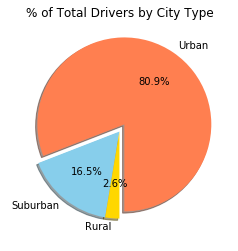

In [17]:
# Calculate Driver Percents
# Because of the way that the data were read into our dataframes and merged, the driver_count variable is going to be the same
# For all cities
# because of that, we're just going to use the original cdf dataframe that we created at the start when reading in the csvs
tot_drivers = cdf.driver_count.sum()
urb_drivers = cdf[cdf.type=='Urban'].driver_count.sum()
sub_drivers = cdf[cdf.type=='Suburban'].driver_count.sum()
rural_drivers = cdf[cdf.type=='Rural'].driver_count.sum()

driver_pcts = [urb_drivers/tot_drivers*100, sub_drivers/tot_drivers*100, rural_drivers/tot_drivers*100]


# Build Pie Charts
# Again, we can use the exact same colors, types, and explode from the above pie charts.
plt.pie(driver_pcts, explode=explode, labels=types, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('% of Total Drivers by City Type')
# Make sure to actually change the title of your graph...

# Save Figure
plt.savefig('figures/pie3.png')
plt.show()

# Report

## Analysis

- As we can see from the scatter plot, rural rides are the highest in average value, but much lower in number of rides. There are many more rides in urban settings, but they are typically lower in fare value. Suburban rides and fares fall in between rural and urban rides. 


- A large majority of drivers are concentrated in urban cities at 80.9%. However, they account for a smaller, yet still large, portion of the fares at 62.7%. One explanation could is that increased competition between drivers for Pyber (as well as other platform competitors) and their general availability mean generally lower prices for fares in urban environments per ride. Alternatively, the ride lengths could be significantly shorter in urban environments, generating less fare revenue. 


- With regards to a driver:fare relationship, rural drivers account for only 2.6% of total Pyber drivers, but 6.8% of fares. Because they represent such a high return, it appears as if this a comparatively underserved market into which Pyber could do well to expand. 